In [1]:
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
from scripts import constants
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
performance_df = pd.read_csv(
    os.path.join(
        constants.DEFAULT_RESULTS_PATH,
        "performance_summary.csv",
    )
)

performance_df = performance_df.melt(
    id_vars=[
        "dataset",
        "method",
        "latent_size",
        "seed",
    ],
    value_vars=[
        "num_epochs",
        "silhouette",
        "calinski_harabasz",
        "davies_bouldin",
        "adjusted_random_index",
        "adjusted_mutual_info",
    ],
).rename(columns={"variable": "metric"})

In [3]:
performance_df = performance_df[
    (performance_df["dataset"].isin(["zheng_2017", "haber_2017", "mcfarland_2020"]))
    & (performance_df["method"].isin(["scVI", "CPLVM", "CGLVM", "contrastiveVI"]))
    & (performance_df["metric"].isin(["silhouette", "adjusted_random_index", "adjusted_mutual_info"]))
]

In [4]:
def format_dataset_name(name):
    if name == "zheng_2017":
        formatted_name = "Zheng et al. 2017"
    elif name == "haber_2017":
        formatted_name = "Haber et al. 2017"
    elif name == "mcfarland_2020":
        formatted_name = "McFarland et al. 2020"
    else:
        formatted_name = name
    return formatted_name

def format_metric_name(name):
    if name == "silhouette":
        formatted_name = "Silhouette"
    elif name == "adjusted_random_index":
        formatted_name = "ARI"
    elif name == "adjusted_mutual_info":
        formatted_name = "AMI"
    else:
        formatted_name = name
    return formatted_name

def format_method_name(name):
    if name == "scVI":
        formatted_name = name
    else:
        formatted_name = name + " (Salient)"
    return formatted_name

In [5]:
datasets = [
    "Zheng et al. 2017",
    "Haber et al. 2017",
    "McFarland et al. 2020",
]

In [6]:
performance_df["dataset"] = pd.Categorical(
    performance_df["dataset"].map(format_dataset_name),
    datasets,
)

performance_df["metric"] = pd.Categorical(
    performance_df["metric"].map(format_metric_name),
    ["Silhouette", "ARI", "AMI"],
)

performance_df["method"] = pd.Categorical(
    performance_df["method"].map(format_method_name),
    ["scVI", "CPLVM (Salient)", "CGLVM (Salient)", "contrastiveVI (Salient)"],
)

performance_df["latent_size"] = pd.Categorical(
    performance_df["latent_size"].astype(str),
    ["2", "10", "32", "64"],
)

In [7]:
performance_df = performance_df.rename(columns={"latent_size": "Latent Dimension"})

In [8]:
sns.set(font_scale=3.5)
sns.set_style("whitegrid")

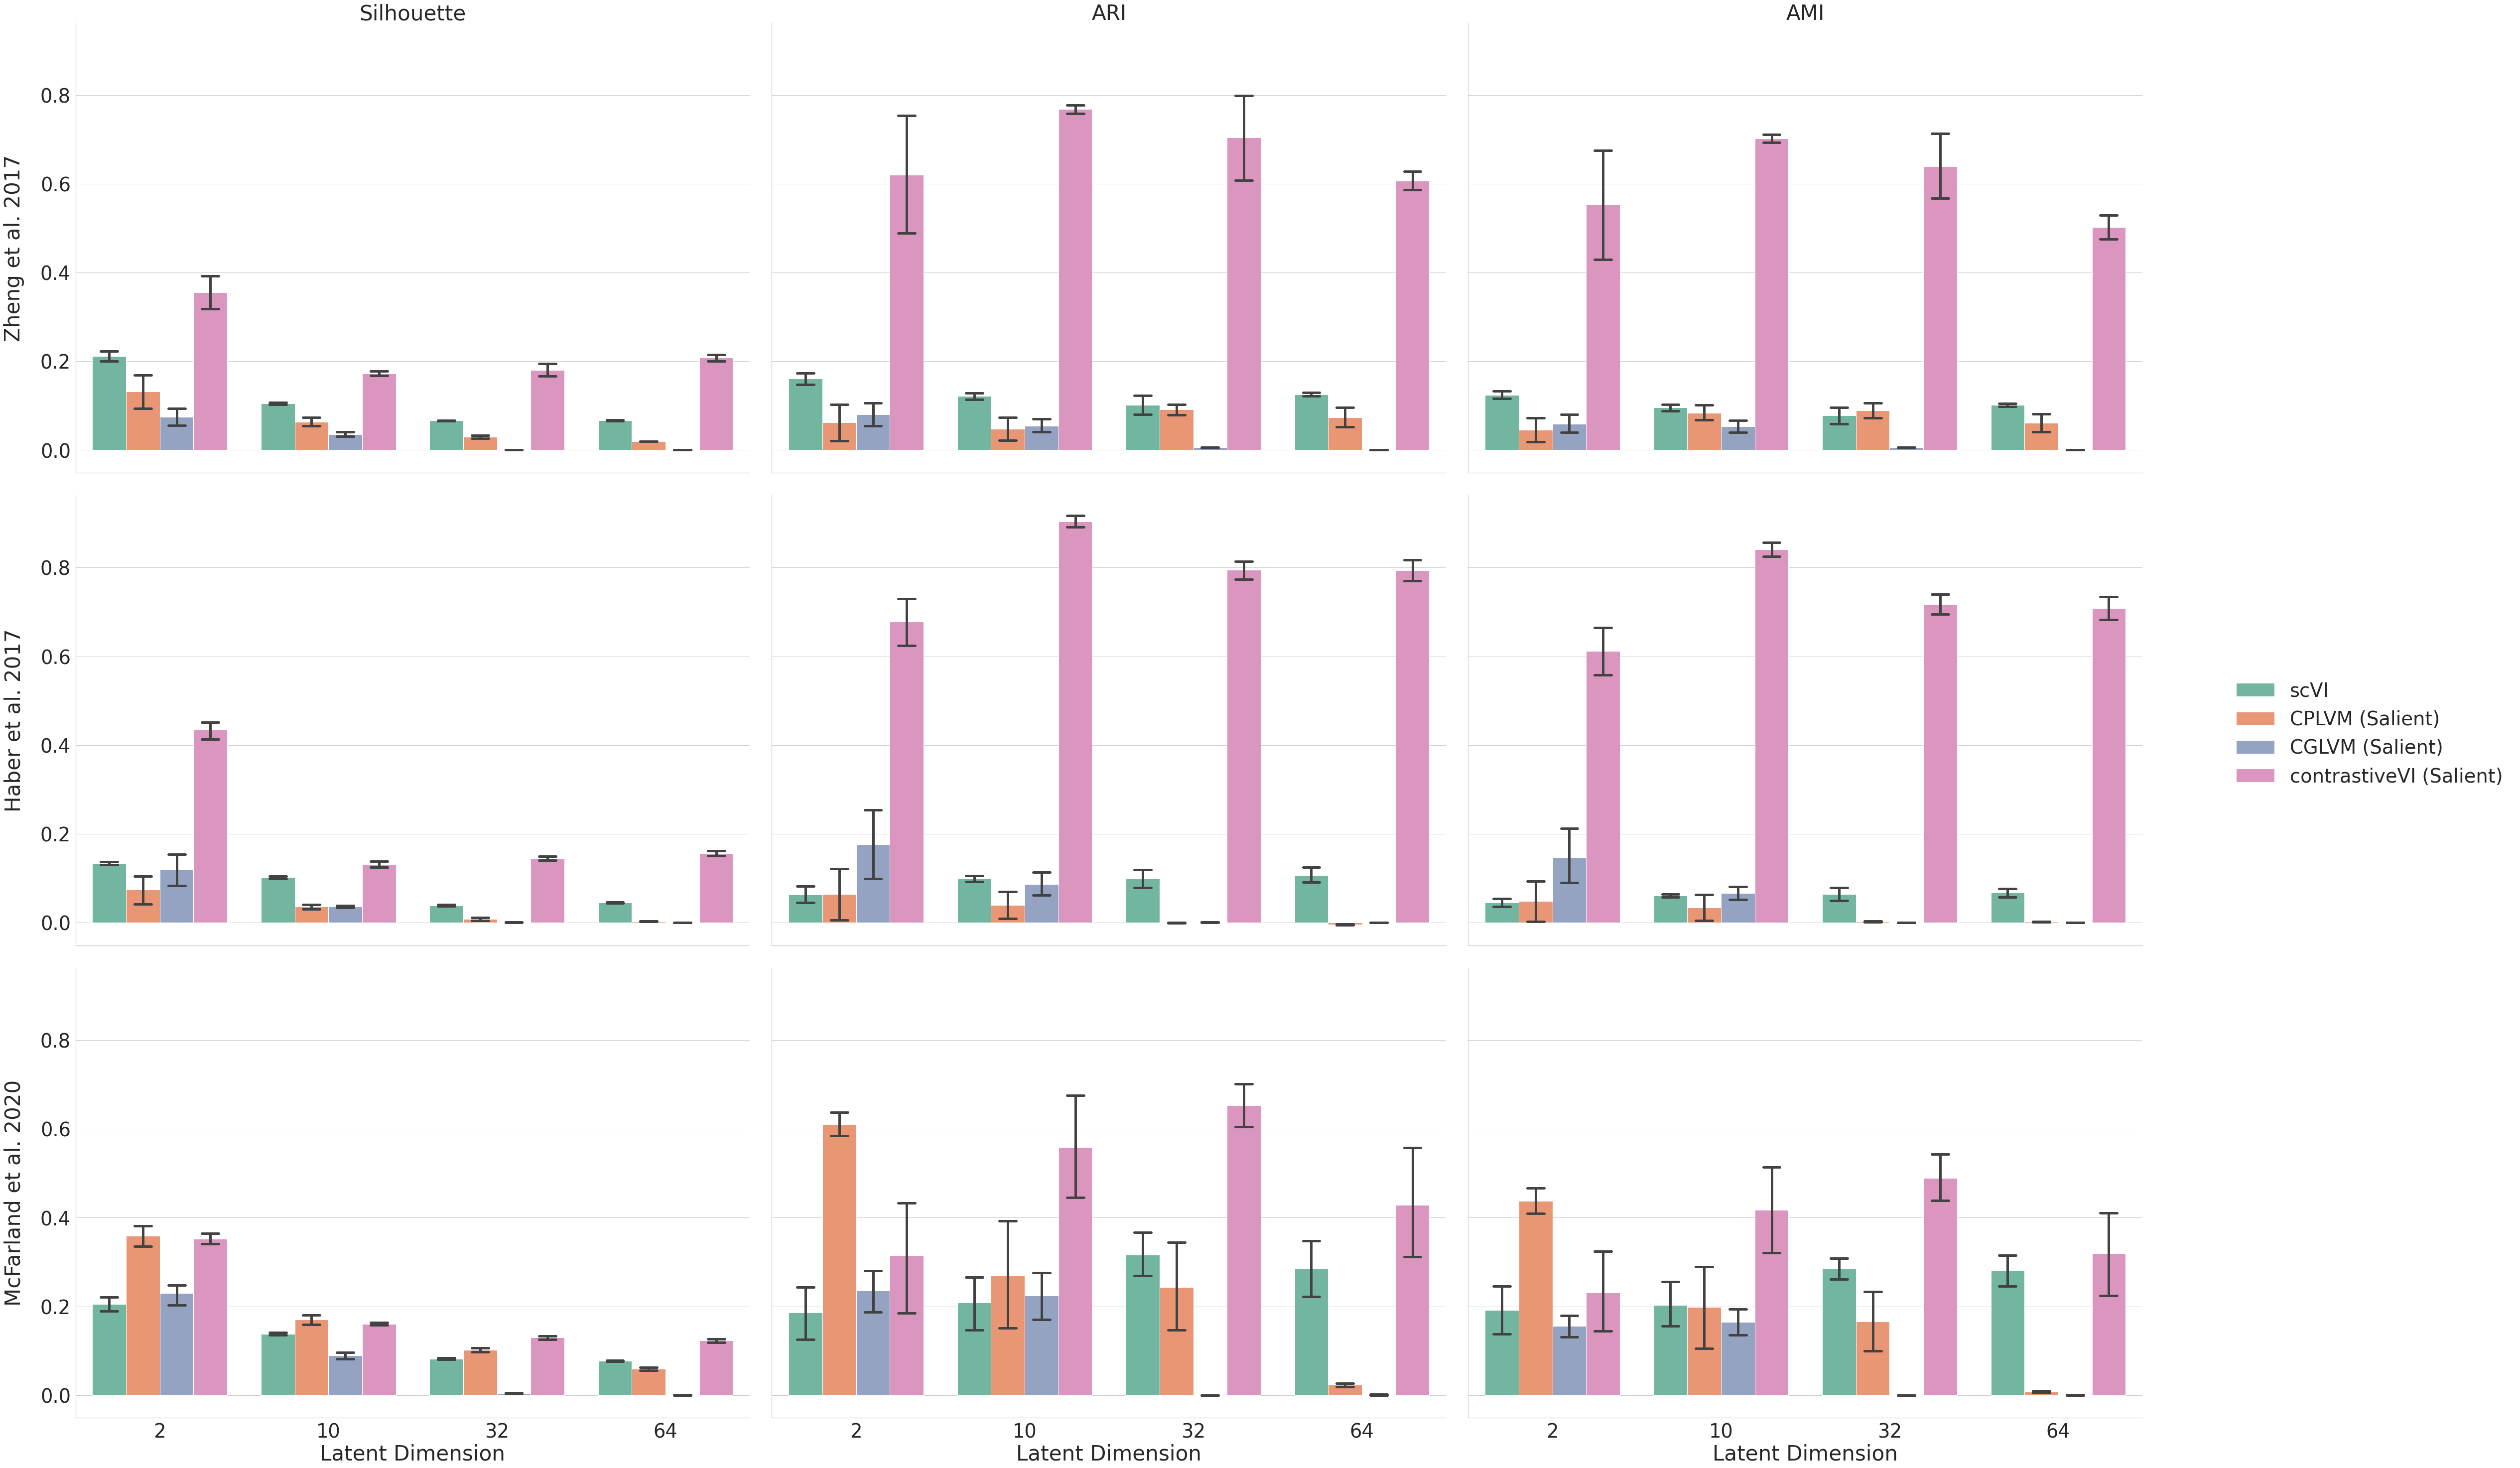

In [9]:
g = sns.FacetGrid(
    performance_df,
    row="dataset",
    col="metric",
    sharey=True,
    margin_titles=True,
    height=14,
    aspect=1.5,
)
g.map_dataframe(
    sns.barplot,
    x="Latent Dimension",
    y="value",
    hue="method",
    ci=68.2,
    errwidth=5,
    capsize=0.10,
    palette=sns.color_palette("Set2"),
)
g.set_titles(
    col_template="{col_name}",
    row_template="",
)
for ax, dataset in zip(g.axes[:,0], datasets):
    ax.set_ylabel(f"{dataset}\n\n", rotation=90, ha="center", va="center")
g.add_legend()